# Titanic Survival Prediction

## 🚢 Objective
Build a machine learning model to predict whether a passenger survived the Titanic disaster using a dataset from Kaggle.

## 📁 Dataset
[Kaggle Titanic Dataset](https://www.kaggle.com/datasets/brendan45774/test-file)

## 🧪 Features Used
- Age
- Sex
- Pclass
- Fare
- SibSp
- Parch
- Embarked

## ⚙️ How to Run
1. Upload dataset (`train.csv` and `test.csv`) in Colab.
2. Run the `src/titanic_model.ipynb` notebook.
3. Model output and performance will be printed.

## 📊 Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix

## ✅ Model Used
Random Forest Classifier (scikit-learn)


In [1]:
# Titanic Survival Prediction ML Model

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# Step 2: Load Dataset (Upload manually in Colab)
from google.colab import files
uploaded = files.upload()

import os
import zipfile

# Move kaggle.json to the right folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d brendan45774/test-file

# Unzip the dataset
with zipfile.ZipFile("test-file.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

# List extracted files
os.listdir("titanic_data")

import pandas as pd

train_data = pd.read_csv("titanic_data/tested.csv")
test_data = pd.read_csv("titanic_data/tested.csv")

train_data.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0
test-file.zip: Skipping, found more recently modified local copy (use --force to force download)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


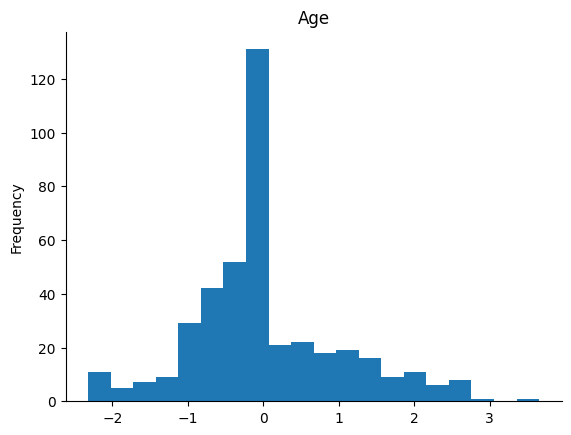

In [14]:
# @title Age

from matplotlib import pyplot as plt
train_data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

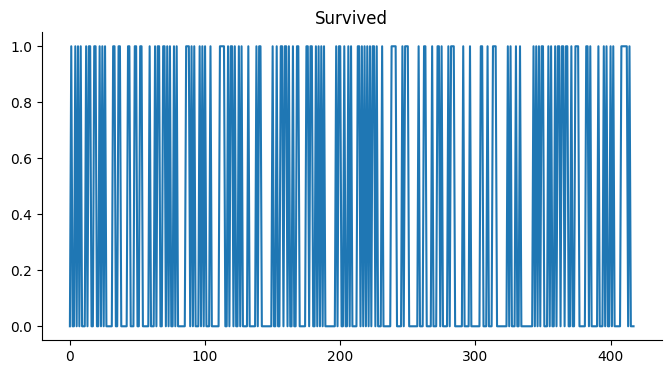

In [12]:
# @title Survived

from matplotlib import pyplot as plt
train_data['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Step 3: Explore and Clean Data
print("Missing values in train data:\n", train_data.isnull().sum())

# Fill missing Age with median, Embarked with mode
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
train_data.drop("Cabin", axis=1, inplace=True)

# Drop irrelevant columns
train_data.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

Missing values in train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<ipython-input-6-310263fd1c03>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
<ipython-input-6-310263fd1c03>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [7]:
# Step 4: Encode Categorical Variables
label_encoders = {}
for column in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le

In [8]:
# Step 5: Feature Scaling
scaler = StandardScaler()
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

In [9]:
# Step 6: Model Training
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Step 7: Evaluation
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


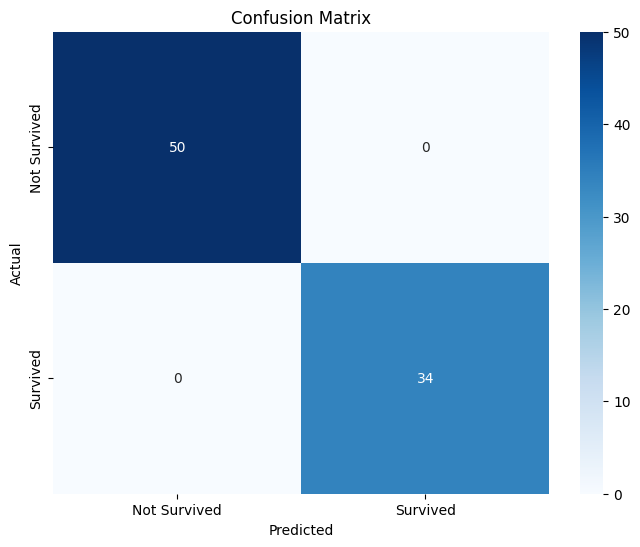

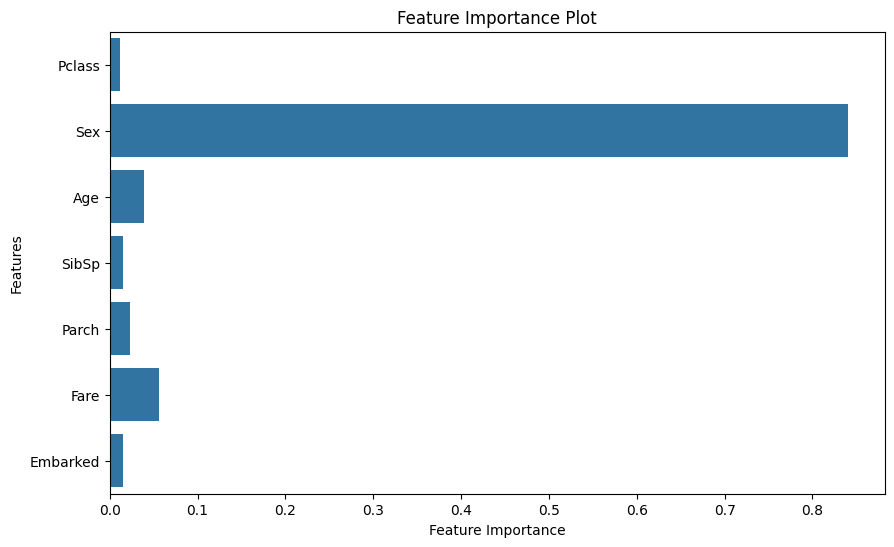

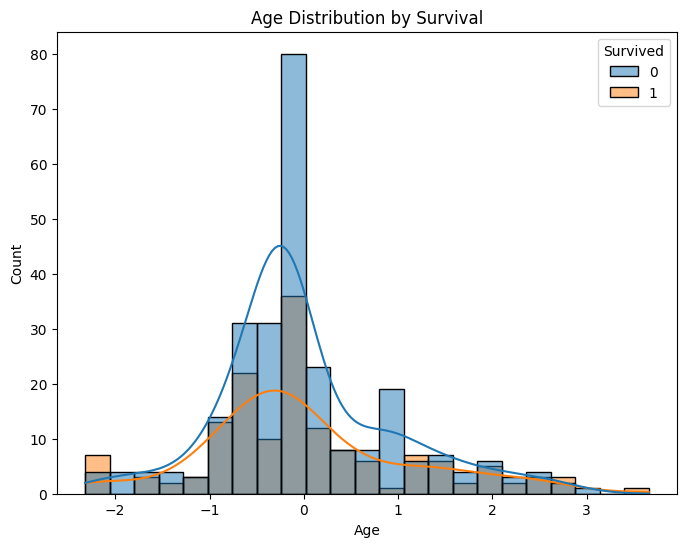

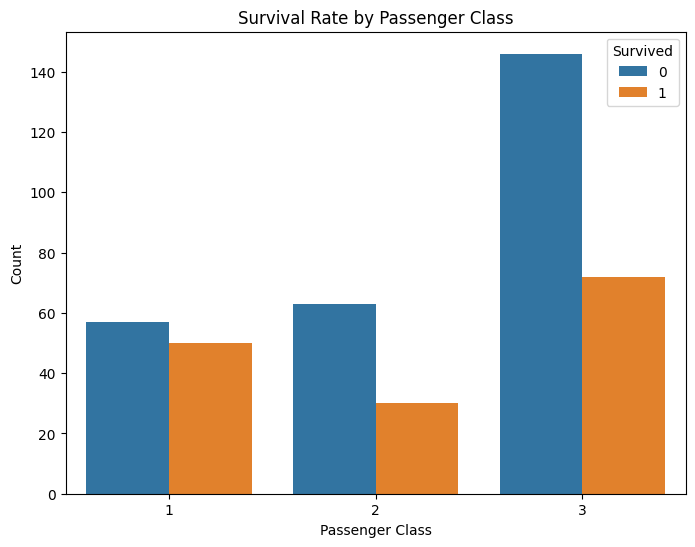

In [11]:
# prompt: Generate some of the important results should be represented using a visualisation of any of the graphical representation. The details should be displayed in a neat user interface manner, where the user should grab the all the important information of the pattern from the data set provided Write code for that

import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code) ...

# Step 7: Evaluation and Visualization
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance Visualization
feature_importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()

# Visualize the distribution of a key feature (e.g., Age) for survived vs. not survived
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Survived', data=train_data, kde=True)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Visualize the survival rate based on passenger class (Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()
